In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from matplotlib import colors
from ipywidgets import interact

In [97]:
log_path = "logs_635769874959605380"

In [88]:
duration = 1000
start = 0
end = 500

# Input

In [21]:
df = pd.read_csv("%s/input.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

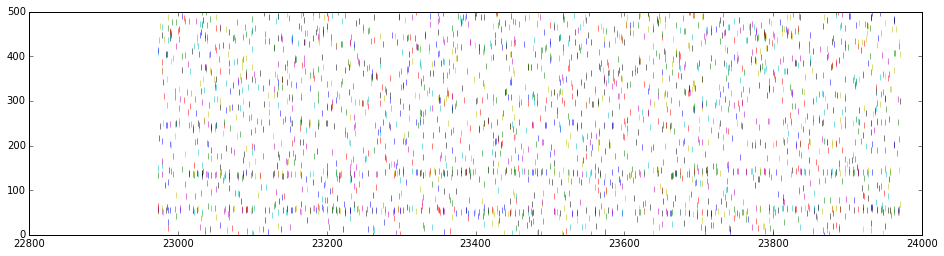

In [22]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Output

In [23]:
df = pd.read_csv("%s/output.csv" % log_path, header=None)
dfs = df.gt(0).applymap(lambda x: 1.0 if x else None)

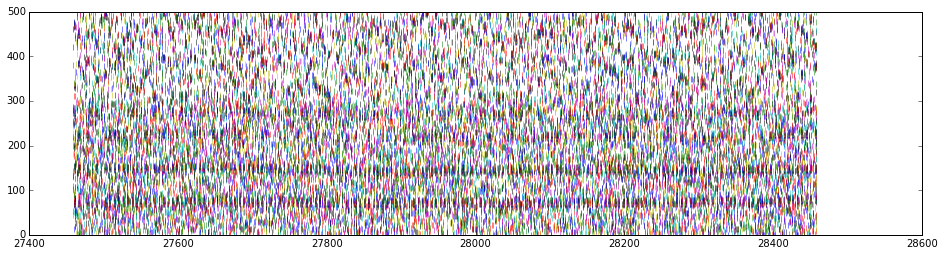

In [24]:
plt.figure(figsize=(16, 4))
for i in dfs.columns[start:end]:
    x = dfs.index[-duration:]
    y = (dfs[i] * i)[-duration:]
    s = dfs[i][:duration].sum()
    plt.plot(x, y, "|")

# Rate

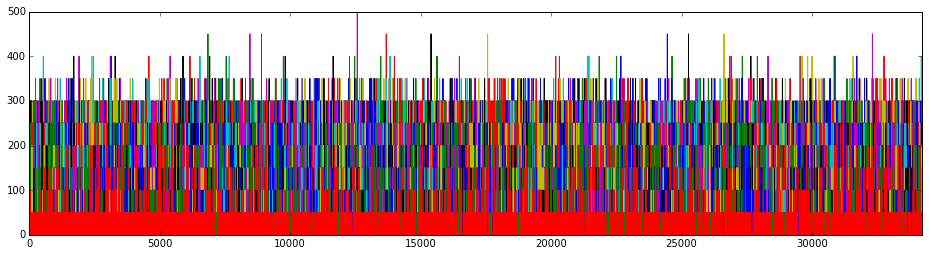

In [26]:
df = pd.read_csv("%s/rate.csv" % log_path, header=None)
df.plot(figsize=(16, 4), legend=False)

# Weights

In [102]:
df = pd.read_csv("%s/weights.csv" % log_path, header=None)

In [103]:
# there are 120,000 synapses total
# 20,000 for each input layer, going to each output layer, in excitatory+inhibitory pairs
# of those 20,000 are 200 outgoing from each input neuron

input_layer_size = 200
output_layer_size = 200
layer_size = input_layer_size * output_layer_size * 2
input_layer_count = 3
output_layer_count = 2

weight_min = -5
weight_max = 5

def plot_weights(f):
    w = df.values[f]
    fig, axs = plt.subplots(output_layer_count, input_layer_count, sharex=True, sharey=True, figsize=(16, 16))
    norm = colors.Normalize(vmin=weight_min, vmax=weight_max)

    for i in range(input_layer_count): # iterate input layers
        for j in range(output_layer_count):
            layer_start = (i * output_layer_count + j) * layer_size
            layer_end = layer_start + layer_size
            layer_w = w[layer_start:layer_end]
            layer_w = np.reshape(layer_w, (400, 200))

            ax = axs[j, i]
            ax.set_title("Input: {}, Output: {}".format(i, j))

            im = ax.imshow(layer_w, interpolation='none', cmap='Spectral', aspect='equal', norm=norm)
            ax.grid(False)

    plt.tight_layout()
    fig.colorbar(im, ax=list(axs.ravel()))

None

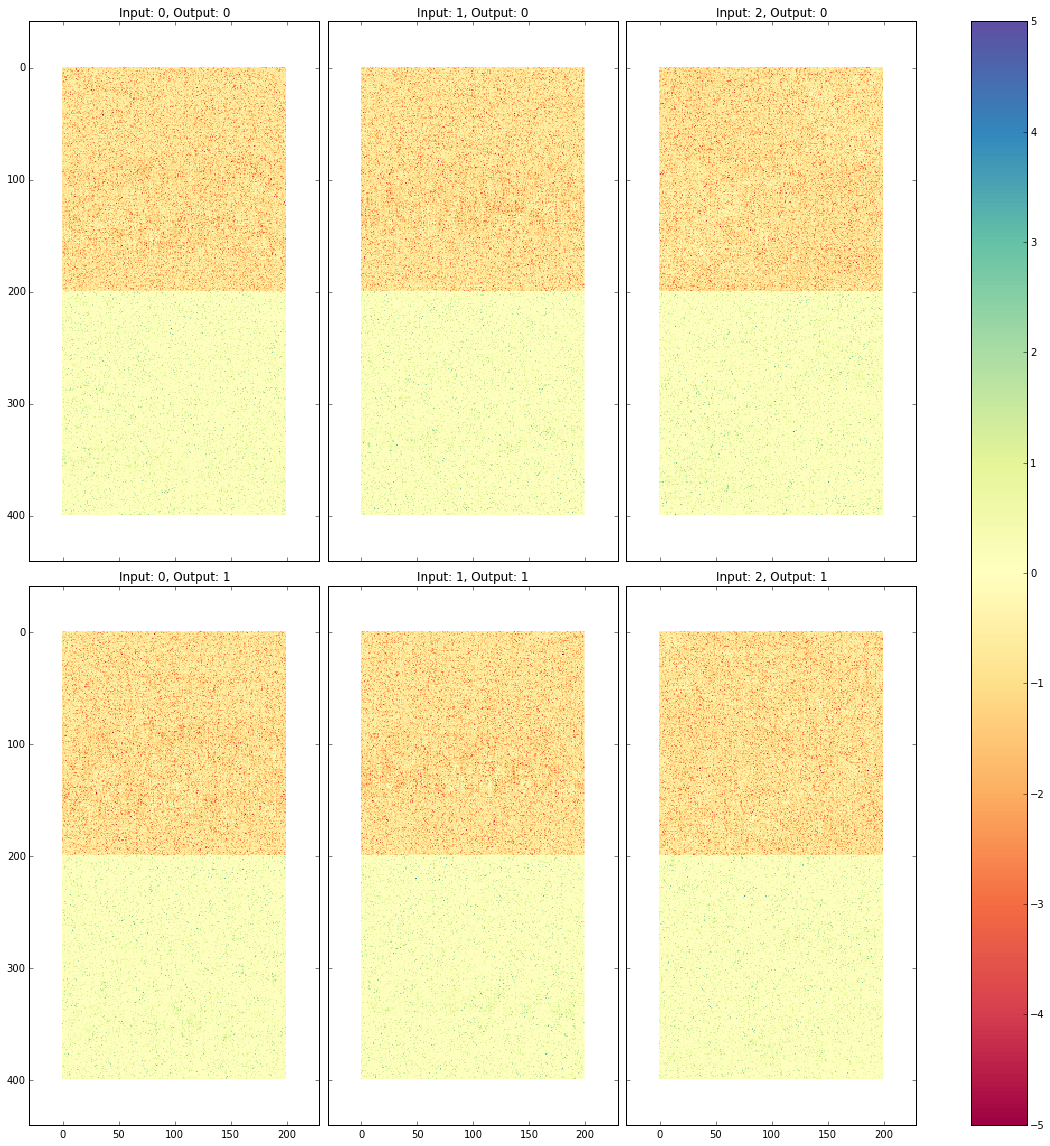

In [104]:
interact(plot_weights, f=(0, len(df.values) - 1))